# Data Cleaning and Data Wrangling

Data wrangling is the process of transforming and structuring data from one raw form into a desired format with the intent of improving data quality and making it more consumable and useful for analytics or machine learning.

Data wrangling prepares your data for the data mining process, which is the stage of analysis when you look for patterns or relationships in your dataset that can guide actionable insights.

Your data analysis can only be as good as the data itself. If you analyze bad data, it's likely that you'll draw ill-informed conclusions and won't be able to make reliable, data-informed decisions.

With wrangled data, you can feel more confident in the conclusions you draw from your data. You'll get results much faster, with less chance of errors or missed opportunities.

In [133]:
import pandas as pd

### Content
- Removing duplicated registries.
- Identifying and selectionig the information of interest.
- Non-standar values in categorical columns.
- Working with missing values.
- Identifying outliers.
- Summary.

In [134]:
# loading the data
housing = pd.read_csv(r"C:\Users\jober\OneDrive\Desktop\Data Science\Data Science - Study notes\Data_used\housing.csv")

In [135]:
pd.set_option('display.max_columns', None)

In [136]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


### Removing duplicated registries.

This is useful to reduce the slack in our data.

In [137]:
# The size of our original dataframe is
rows_original = housing.shape[0] # the first position of the tuple returned by the shape method represents the number of rows
rows_original

20640

In [138]:
rows_dif = housing.drop_duplicates().shape[0] 
rows_dif

20640

As seen, the number of duplicated registries were `206` rows.

### Identifying and selectiong the information of interest.

To get the info of interest we drop the columns in the dataset as:

In [139]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Then, we list the columns we desire:

In [140]:
housing = housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']]

In this case, we selected the whole dataset. If a column is not of insteres, just left it out of the list.

### Non-standar values in categorical columns.

To do this, we first identify the type of data in each column as follow:

In [141]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [142]:
# Then, from our dataset
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

From here on, we confirm there are all regular values in our column 'ocean_proximity'.

### Working with missing values.

The first element we must check are the null values. We do it as follows:

In [143]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We can get filter them as follows:

In [144]:
filter = housing['total_bedrooms'].isna()
housing[filter].head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [145]:
# To check the amount of bedrooms exists in the houses in the NEAR BAY category
filter2 = housing['ocean_proximity'] == 'NEAR BAY'
housing[filter2]['total_bedrooms'].value_counts()

total_bedrooms
236.0     11
353.0     11
190.0      9
322.0      9
348.0      9
          ..
786.0      1
737.0      1
1081.0     1
1611.0     1
988.0      1
Name: count, Length: 932, dtype: int64

Those are not representatives of the "NEAR BAY" category.

Then, we obtain that there is only one column with missing values. Those values are numerical values as previously identifyed, so it is not recommended to eliminate the rows from our dataframe. Those requires further analysis. 

The amount of rows with missing values are `207`, those represent `1%` out of `20640` total rows. The knowledge of the Analyst should decide what to do with them.

Hence, here we face a dichotomy. Those registries in the data either are errors (lacks important data) or are little constructions like kiosks. In a real scennario, we do recommend asking experts on the data in order to decide what to do with it.

If those are errors that arose during recolection, elimination of the registries is prefered. Specially, due to it's small amount (1%). However, for educational pourposes We'll assume there is missing data on those registries. When this path is chosen, we fill the null values with some central tendency parameters.

From our general dataset, we can get the following statistics:

In [146]:
# Central tendency statistics
mean = housing['total_bedrooms'].mean()
median = housing['total_bedrooms'].median()
mode = housing['total_bedrooms'].mode()

print(f"The mean of bedrooms are: '{mean}', the median is: '{median}', and the mode is: {mode}")

The mean of bedrooms are: '537.8705525375618', the median is: '435.0', and the mode is: 0    280.0
Name: total_bedrooms, dtype: float64


It makes more sense to replace the missing values with the median of bedrooms rather than the median. Houses can not be built with factions of Bedrooms. To replace those missing values we use a `mask`:

In [147]:
mask = (housing['total_bedrooms'].isna())
housing.loc[mask, 'total_bedrooms'] = 435.0

In [148]:
# Then a validation of null values is made as before:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Identifying outliers.

Sometimes it is useful plotting the data to identify outliers. This is the easiest way to start. In this case we'll use a scatter plot to get sense of the distribution of our numerical variables represented in each column as:

<Axes: xlabel='households', ylabel='median_income'>

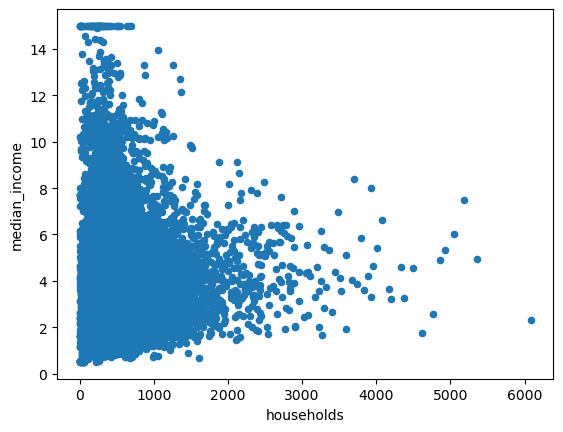

In [150]:
housing[['households','median_income']].plot(kind='scatter', x='households', y='median_income') 

A median income superior to 14k is clearly an outlier. Then we can filter it as before:

In [160]:
housing[housing['median_income']>= 15].head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1566,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001,350000.0,<1H OCEAN
4352,-118.37,34.10,37.0,407.0,67.0,100.0,47.0,15.0001,500001.0,<1H OCEAN
4604,-118.33,34.06,52.0,1841.0,240.0,693.0,218.0,15.0001,500001.0,<1H OCEAN
4605,-118.33,34.07,52.0,2248.0,255.0,813.0,265.0,15.0001,500001.0,<1H OCEAN
4606,-118.33,34.07,52.0,1482.0,171.0,531.0,161.0,15.0001,500001.0,<1H OCEAN


Another, and most accurate, way to identify outliers is using the IQR (From 5% to 95%).

In [159]:
housing['median_income'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600570
0.25    2.563400
0.50    3.534800
0.75    4.743250
0.95    7.300305
Name: median_income, dtype: float64

From that we can properly indicate that outliers are any registry with median income lower than 1.600570 or higher than 7.300305. Those registries are found as:

In [164]:
filter3 = ( (housing['median_income']<= 1.600570) | (housing['median_income']>= 7.300305))
# The dataframe not considered outlier for this variable can be obtained by neglating the filter
housing[~filter3].shape

(18576, 10)

Boxplot are also useful.

Text(0, 0.5, 'Median income')

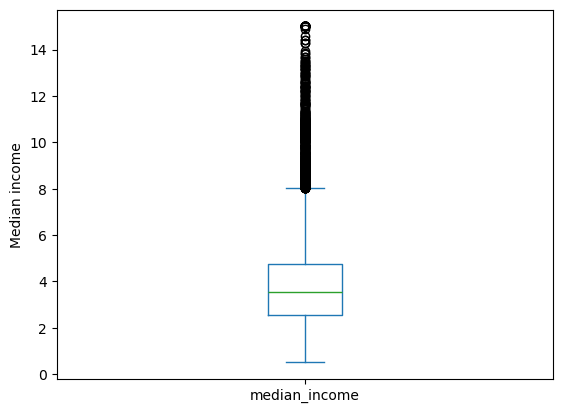

In [165]:
ax = housing['median_income'].plot.box()
ax.set_ylabel('Median income')

# Summary

This chapter briefly illustrate how to clean a dataset. Special atention has been given to how to remove duplicated registries, how to identify and to select columns of interest, how to edit non-standar values in categorical columns, how to work with missing values, and how to identify outliers. All the procedure was developed using a dataset about house prices in USA extracted from kaggle.
